In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf
import os

In [2]:
#import dataset
df = pd.read_csv('quaterlyECB.csv')
df.head()

,TIME,RGDP,HICP,M1,M3,LONFC,LOHH,LONFPS,CRNFPS,M12GDP,...,INDCONF,CSTRCONF,STOASSESS,BCI,CONCONF,RETCONF,SERVCONF,PMIMAN,PMICOMP,CAPUTILMANUF
0,1990Q1,1804547.170,58.65,23.45,29.57,1304063.315,1335500.397,2639563.712,4326.0,26.30,...,3.74,1.30,5.57,0.96,-2.59,1.74,NaN,NaN,NaN,84.431
1,1990Q2,1812744.699,59.10,23.62,30.00,1347475.600,1368718.692,2716194.292,4423.0,26.01,...,2.21,0.09,5.60,0.78,-3.00,1.79,NaN,NaN,NaN,84.525
2,1990Q3,1828762.717,59.71,24.14,30.65,1390924.156,1391283.918,2782208.074,4519.0,26.09,...,0.82,-0.64,5.50,0.56,-4.92,2.77,NaN,NaN,NaN,85.055
3,1990Q4,1839905.609,60.53,24.45,31.30,1443163.891,1417421.638,2860585.530,4652.0,25.99,...,-1.81,-5.34,7.67,0.21,-7.48,2.70,NaN,NaN,NaN,84.514
4,1991Q1,1852668.575,61.09,24.68,31.91,1483816.796,1443261.824,2927078.620,4737.0,25.68,...,-9.48,-8.99,10.51,-0.73,-9.41,-4.75,NaN,NaN,NaN,83.168


In [3]:
rgdp = df['RGDP'].values.astype(float) 
fc = df['FC'].values.astype(float) #financial cycle
print(fc)
print(rgdp)

rgdp_lag = np.roll(rgdp, 1)
rgdp_lag[0] = 0

[0.848 0.87  0.819 0.658 0.702 0.74  0.602 0.568 0.581 0.517 0.417 0.352
 0.348 0.348 0.41  0.457 0.467 0.378 0.302 0.226 0.246 0.306 0.414 0.431
 0.513 0.522 0.551 0.631 0.669 0.774 0.811 0.76  0.828 0.865 0.855 0.856
 0.892 0.824 0.768 0.755 0.813 0.814 0.75  0.686 0.742 0.6   0.539 0.559
 0.527 0.502 0.506 0.496 0.434 0.541 0.578 0.62  0.662 0.638 0.664 0.722
 0.789 0.815 0.822 0.853 0.876 0.837 0.831 0.878 0.845 0.761 0.7   0.587
 0.461 0.316 0.211 0.207 0.173 0.189 0.26  0.345 0.3   0.283 0.301 0.301
 0.227 0.176 0.143 0.098 0.104 0.079 0.104 0.141 0.123 0.145 0.149 0.226
 0.256 0.331 0.333 0.375 0.493 0.469 0.458 0.484 0.566 0.546 0.548 0.496
 0.446 0.527 0.544 0.543 0.504 0.483 0.445 0.387 0.482 0.544 0.61  0.631
 0.695 0.779 0.838 0.875 0.7   0.675 0.587 0.423 0.272 0.162]
[1804547.17  1812744.699 1828762.717 1839905.609 1852668.575 1858127.745
 1856807.93  1875276.01  1903633.737 1889058.123 1882950.391 1879997.124
 1867236.181 1868577.027 1875509.769 1881233.331 1898714.444 1

In [22]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Standardize rgdp
rgdp = scaler.fit_transform(rgdp.reshape(-1, 1)).flatten()

# Standardize fc
fc = scaler.fit_transform(fc.reshape(-1, 1)).flatten()

# Use the standardized variables in the regression analysis
quant_reg_1 = sm.QuantReg(rgdp, fc).fit(q=0.1)
quant_reg_5 = sm.QuantReg(rgdp, fc).fit(q=0.5)
quant_reg_9 = sm.QuantReg(rgdp, fc).fit(q=0.9)

# Print the summary of the quantile regression results
print(quant_reg_1.summary())
print(quant_reg_5.summary())
print(quant_reg_9.summary())


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               -1.369
Model:                       QuantReg   Bandwidth:                      0.8397
Method:                 Least Squares   Sparsity:                        2.573
Date:                Thu, 09 Mar 2023   No. Observations:                  130
Time:                        20:42:16   Df Residuals:                      129
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.3151      0.151     -2.092      0.038      -0.613      -0.017
                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:              0.07318
Model:                       QuantReg   Bandwidth:  

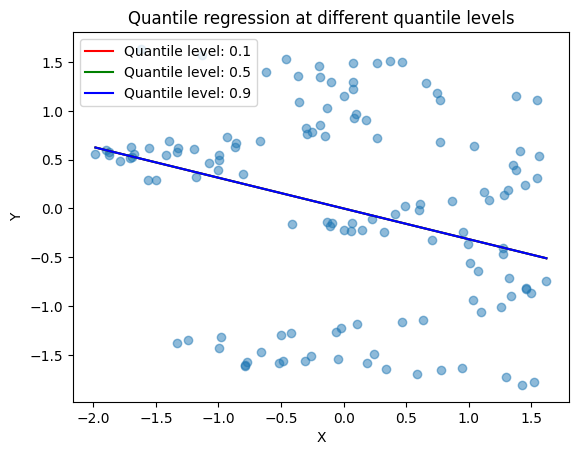

In [10]:
################################ Quantile regression plot ##############################
################################ Yt = α + βYt-1 + γXt + εt + θεt-1
# Create a scatter plot of the data
plt.scatter(fc, rgdp, alpha=0.5)

# Plot the quantile regression lines at different quantile levels
x_sort = np.sort(fc)
y_pred_1 = quant_reg_1.predict(x_sort)
y_pred_5 = quant_reg_5.predict(x_sort)
y_pred_9 = quant_reg_9.predict(x_sort)

plt.plot(x_sort, y_pred_1, color='red', label='Quantile level: 0.1')
plt.plot(x_sort, y_pred_5, color='green', label='Quantile level: 0.5')
plt.plot(x_sort, y_pred_9, color='blue', label='Quantile level: 0.9')

# Add a legend and labels to the plot
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Quantile regression at different quantile levels')
plt.show()


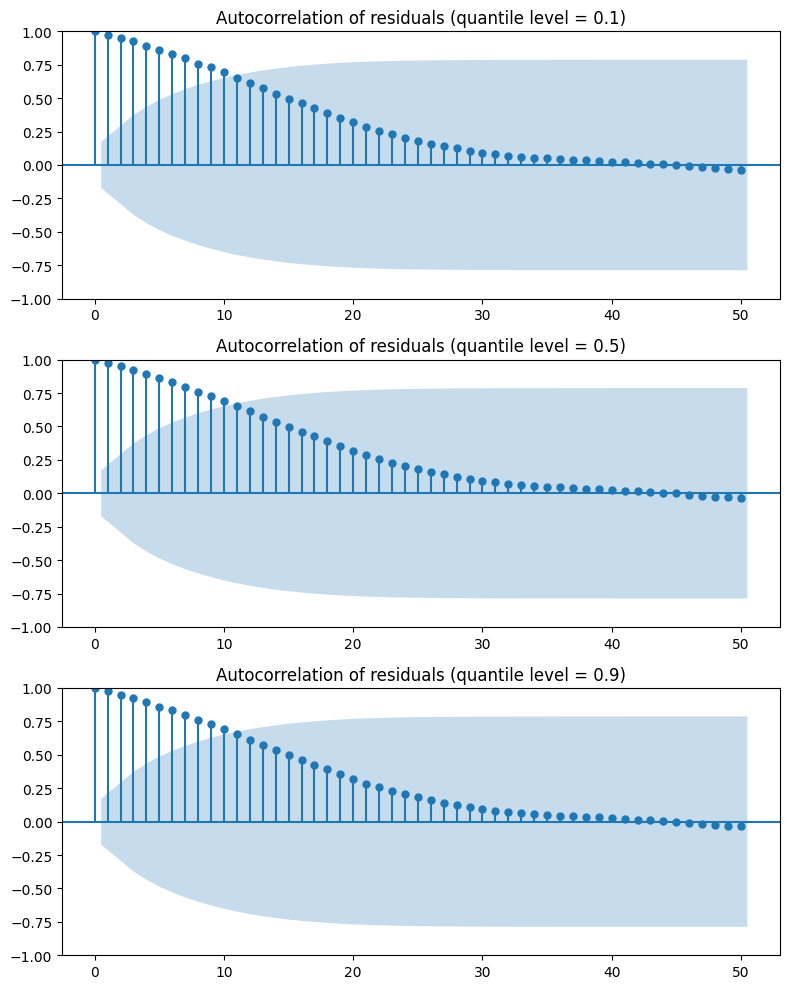

In [13]:
################################ Autocorrelation of the residuals ##############################
residuals_1 = quant_reg_1.resid # Calculate the residuals
residuals_5 = quant_reg_5.resid # Calculate the residuals
residuals_9 = quant_reg_9.resid # Calculate the residuals

# Plot the autocorrelation function of the residuals for all three quantile regression models in one plot
fig, ax = plt.subplots(3, 1, figsize=(8, 10))
plot_acf(quant_reg_1.resid, lags=50, ax=ax[0])
ax[0].set_title('Autocorrelation of residuals (quantile level = 0.1)')
plot_acf(quant_reg_5.resid, lags=50, ax=ax[1])
ax[1].set_title('Autocorrelation of residuals (quantile level = 0.5)')
plot_acf(quant_reg_9.resid, lags=50, ax=ax[2])
ax[2].set_title('Autocorrelation of residuals (quantile level = 0.9)')
plt.tight_layout()
plt.show()

#Autocorrelation fades away as the lags increase



In [18]:
from statsmodels.stats.diagnostic import acorr_ljungbox
# Perform Ljung-Box test with up to 10 lags
lbtest = acorr_ljungbox(residuals_1, lags=50)

# Print p-values for each lag
print(lbtest)

        lb_stat      lb_pvalue
1    126.210188   2.765817e-29
2    247.131975   2.167572e-54
3    363.066271   2.209455e-78
4    471.871543  8.110115e-101
5    573.638966  1.002138e-121
6    669.524898  2.320352e-141
7    758.093658  2.042095e-159
8    839.117014  7.610111e-176
9    914.969602  3.680252e-191
10   983.711384  6.032060e-205
11  1045.230069  3.530894e-217
12  1099.865490  6.216838e-228
13  1148.156212  2.513859e-237
14  1190.408578  2.000406e-245
15  1227.321552  2.210700e-252
16  1259.373793  2.671436e-258
17  1286.866422  3.035099e-263
18  1310.217421  2.631578e-267
19  1329.613834  1.584541e-270
20  1345.424958  5.510938e-273
21  1358.222654  8.335080e-275
22  1368.724686  3.843192e-276
23  1377.232048  4.653266e-277
24  1384.006034  1.299837e-277
25  1389.442182  6.891268e-278
26  1393.691462  6.435463e-278
27  1397.006944  9.345457e-278
28  1399.572349  1.928089e-277
29  1401.496107  5.358475e-277
30  1402.934158  1.858466e-276
31  1404.069368  7.355717e-276
32  1404

In [19]:
from statsmodels.stats.stattools import durbin_watson
# Perform Durbin-Watson test
dwtest = durbin_watson(residuals_1)

# Print test statistic
print(dwtest)

#positive autocorrelation

0.02707920085526392


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


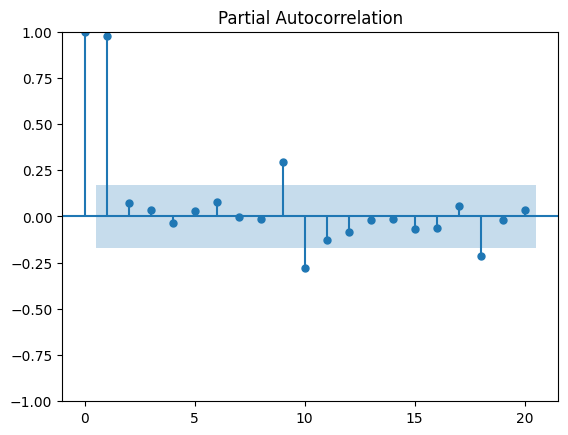

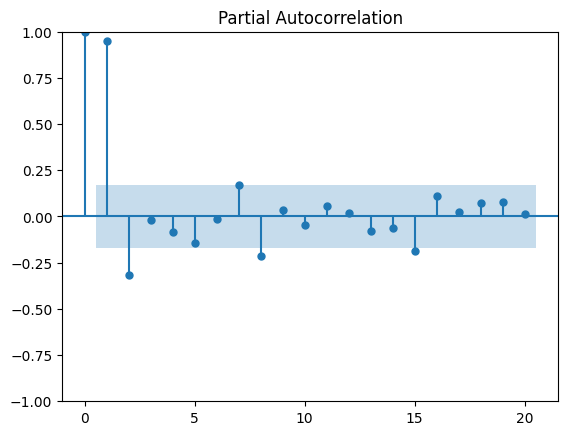

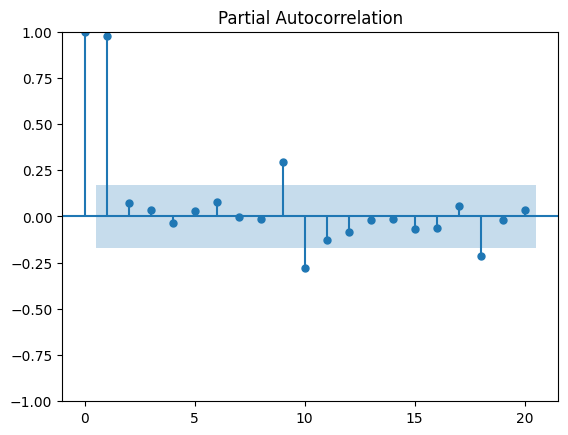

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot PACF of the time series
plot_pacf(fc, lags=20)
plot_pacf(rgdp, lags=20)

In [ ]:
M1	M3	LNFC	LHH	LNFPS	LRNFCSPR	LRHHSPR	LRNFPSSPR	CRSPR	YC3M	YC1Y	YC2Y	YC3Y	YC2YW	YCEONIA	EATEDSPR	STP	USDEUROXRATE	NEER	VSTOXX	FCIBME	FCIVAR	FCIIPA	FCIBBG	FCIGS	CISS	CISSnew	OILPUSD	GAPPEURUSD	RAWMATPUSD	IP	UR	EMPL	RETTRADE	EUROCOIN	ESI	INDCONF	CSTRCONF	STOASSESS	BCI	CONCONF	RETCONF	SERVCONF	PMIMAN	PMICOMP